<a href="https://colab.research.google.com/github/sttesta3/7506R-1C2024-GRUPO08/blob/pre_PR_categorizacion/7506R-1C2024-GRUPO08-AGRUPAMIENTO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Seteo inicial del notebook y carga de datos

In [ ]:
# General libs
import pandas as pd
import numpy as np

import geopandas as gpd
from shapely.geometry import Point

#Visualizaciones
import seaborn as sns
import matplotlib.pyplot as plt

#Modelos
from sklearn.cluster import KMeans

# KFold cross validation
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

#Otras librerías
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [ ]:
# Ruta donde van a estar todos los datasets
ruta = "https://raw.githubusercontent.com/sttesta3/7506R-1C2024-GRUPO08/fede/datasets/"
ds = pd.read_csv(ruta + "ds_filtrado.csv")

ds.drop(columns="start_date",inplace=True)
ds.drop(columns="place_l3",inplace=True)
ds.drop(columns="property_type",inplace=True)

ds.info()

ds_train = ds
# ds_train, ds_test = train_test_split(ds, test_size=0.2 , random_state=2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52366 entries, 0 to 52365
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   latitud                   52366 non-null  float64
 1   longitud                  52366 non-null  float64
 2   property_rooms            52366 non-null  int64  
 3   property_bedrooms         52366 non-null  int64  
 4   property_surface_total    52366 non-null  float64
 5   property_surface_covered  52366 non-null  float64
 6   property_price            52366 non-null  float64
dtypes: float64(5), int64(2)
memory usage: 2.8 MB


### CLUSTERING con KMEANS

#### Hopkins: Analisis de tendencia al agrupamiento

In [ ]:
# Por los errores comentados por Slack ( imposibilidad de importar pyclusterend ) y por problemas en la ejecucciòn del còdigo de la catedra
# Se utilizo la siguiente función definida en el siguiente repositorio: "https://github.com/prathmachowksey/Hopkins-Statistic-Clustering-Tendency/tree/master"

#importing the required libraries
from sklearn.neighbors import NearestNeighbors
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from random import sample
from numpy.random import uniform
# function to compute hopkins's statistic for the dataframe X
def hopkins_statistic(X):

    X=X.values  #convert dataframe to a numpy array
    sample_size = int(X.shape[0]*0.05) #0.05 (5%) based on paper by Lawson and Jures


    #a uniform random sample in the original data space
    X_uniform_random_sample = uniform(X.min(axis=0), X.max(axis=0) ,(sample_size , X.shape[1]))



    #a random sample of size sample_size from the original data X
    random_indices=sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]


    #initialise unsupervised learner for implementing neighbor searches
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs=neigh.fit(X)

    #u_distances = nearest neighbour distances from uniform random sample
    u_distances , u_indices = nbrs.kneighbors(X_uniform_random_sample , n_neighbors=2)
    u_distances = u_distances[: , 0] #distance to the first (nearest) neighbour

    #w_distances = nearest neighbour distances from a sample of points from original data X
    w_distances , w_indices = nbrs.kneighbors(X_sample , n_neighbors=2)
    #distance to the second nearest neighbour (as the first neighbour will be the point itself, with distance = 0)
    w_distances = w_distances[: , 1]



    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)

    #compute and return hopkins' statistic
    H = u_sum/ (u_sum + w_sum)
    return H

results = []
for i in range(0,100):
  results.append(hopkins_statistic(ds_train))

print("Tendencia al agrupamiento: {}%".format(round(sum(results)/len(results),4)*100))


Tendencia al agrupamiento: 99.65%


##### El agrupamiento es elevado, casi seguro. Es importante recordar el mapa de correlaciones para encontrar las bases de este resultado, ya que las correlaciones fuertes nos indican que los parametros en cuestión tienen una variación conjunta.

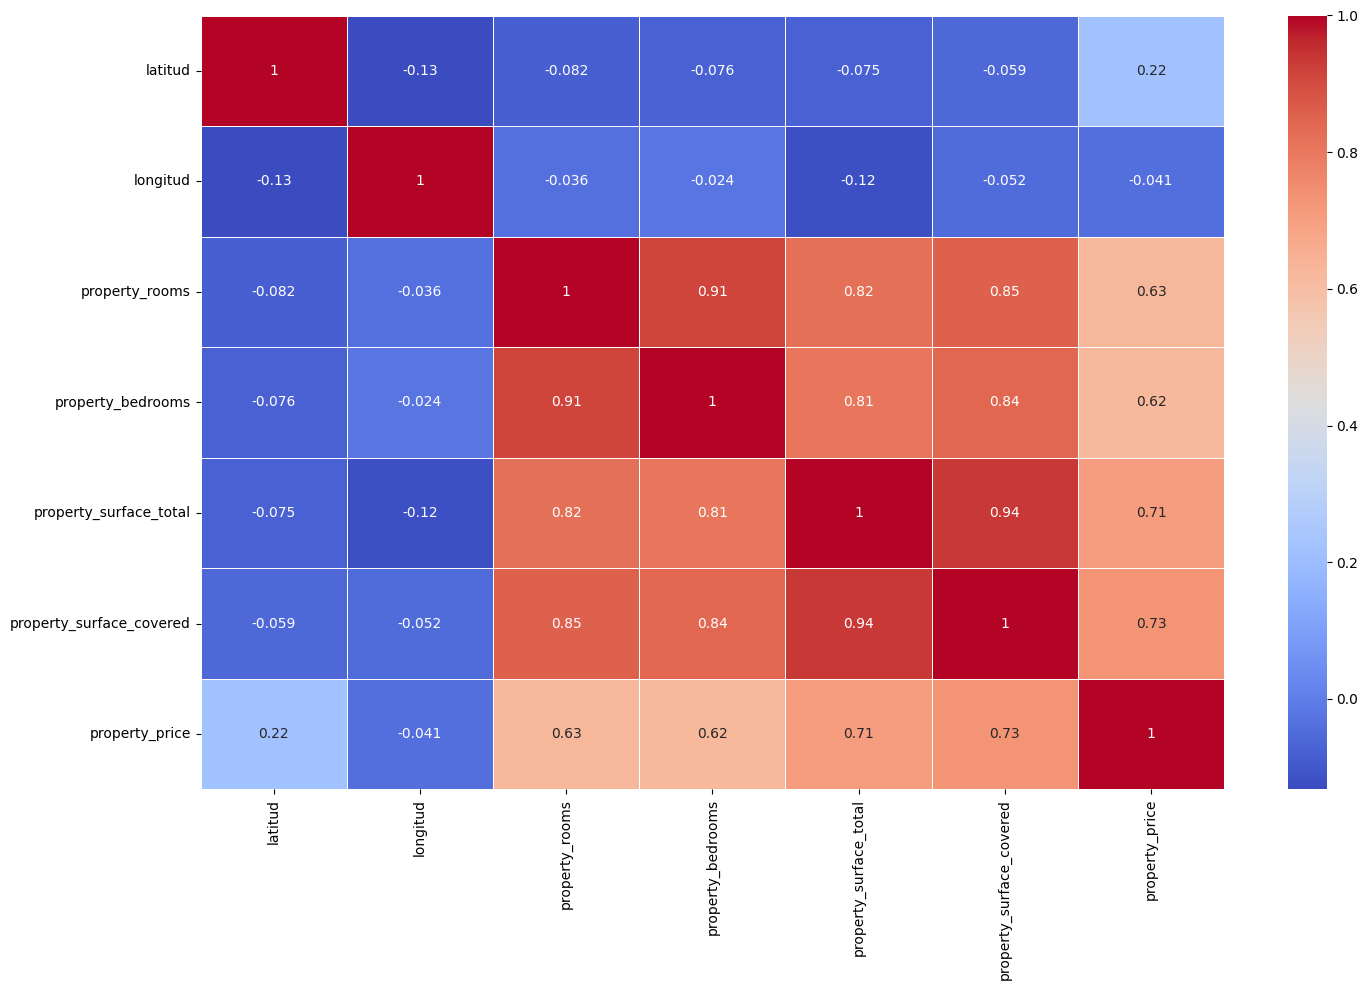

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(data = ds_train.corr(),
            annot = True,
            cmap = "coolwarm",
            linewidths = 0.5,
            ax = ax)

fig.tight_layout()

In [ ]:
'''
# Se deja comentado el codigo de la catedra, se intento con el mismo y no logramos utilizarlo correctamente
import random
from sklearn.neighbors import NearestNeighbors

# Función para definir el coeficiente de Hopkins (tendencia al clustering del dataset)
def Hopkins(df,*args):
    n = df.shape[0] # filas
    d = df.shape[1] # columnas
    if not args:
        print("Numero de puntos al azar por defecto")
        m = int(0.1 * n) # cantidad de puntos al azar (default)
    else:
        m = args[0] # cantidad de puntos al azar

    nbrs = NearestNeighbors(n_neighbors=1, algorithm='brute').fit(df) # buscador de vecinos

    rand_ind = random.sample(range(0, n, 1), m) # indices al azar

    ui = []
    wi = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(np.random.normal(size=(1, d)).reshape(1, -1), 2, return_distance=True) # distancia a los nuevos puntos
        ui.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(df[rand_ind[j]].reshape(1, -1), 2, return_distance=True) # distancia a los puntos al azar
        wi.append(w_dist[0][1])

    H = sum(wi) / (sum(ui) + sum(wi))
    return H

# hop = ds_train.drop( , axis=1)
from sklearn.preprocessing import StandardScaler

target = list(ds_train.columns.values)
hop = ds_train.drop(target, axis=1)
print(hop)
hop=StandardScaler().fit_transform(hop)
#print(Hopkins(hop))

hop = StandardScaler().fit_transform(ds_train)
print( Hopkins(hop) )
'''

'\n# Se deja comentado el codigo de la catedra, se intento con el mismo y no logramos utilizarlo correctamente\nimport random\nfrom sklearn.neighbors import NearestNeighbors\n\n# Función para definir el coeficiente de Hopkins (tendencia al clustering del dataset)\ndef Hopkins(df,*args):\n    n = df.shape[0] # filas\n    d = df.shape[1] # columnas\n    if not args:\n        print("Numero de puntos al azar por defecto")\n        m = int(0.1 * n) # cantidad de puntos al azar (default)\n    else:\n        m = args[0] # cantidad de puntos al azar\n\n    nbrs = NearestNeighbors(n_neighbors=1, algorithm=\'brute\').fit(df) # buscador de vecinos\n\n    rand_ind = random.sample(range(0, n, 1), m) # indices al azar\n\n    ui = []\n    wi = []\n    for j in range(0, m):\n        u_dist, _ = nbrs.kneighbors(np.random.normal(size=(1, d)).reshape(1, -1), 2, return_distance=True) # distancia a los nuevos puntos\n        ui.append(u_dist[0][1])\n        w_dist, _ = nbrs.kneighbors(df[rand_ind[j]].resha

#### KMEANS. Busqueda de cantidad de clusters optima

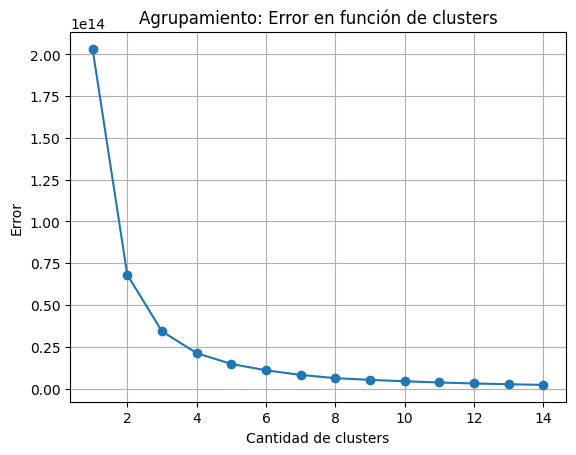

In [ ]:
# Corro el algoritmo con K entre 2 y 10 y voy guardando el error para luego graficarlo.
errores = []

for clusters in range(1,15):
    km = KMeans(n_clusters=clusters)
    km.fit(ds_train)
    errores.append(km.inertia_)

plt.plot(range(1,15), errores,"-o")
plt.title("Agrupamiento: Error en función de clusters")
plt.xlabel("Cantidad de clusters")
plt.ylabel("Error")
plt.grid()
plt.show()

##### ANALISIS: Hemos encontrado la cantidad óptima de clusters "aka codo" en cuatro clusters.

#### SILHOUETTE

#### Score de silhouette para el rango de clusters cercano al codo

In [ ]:
from sklearn.metrics import silhouette_score

for n_clusters in range(2, 7):
    km = KMeans(n_clusters=n_clusters)
    preds = km.fit_predict(ds_train)

    score = silhouette_score (ds_train, preds)
    print ("For n_clusters =",n_clusters, " silhouette score is ",round(score,3))

For n_clusters = 2  silhouette score is  0.633
For n_clusters = 3  silhouette score is  0.578
For n_clusters = 4  silhouette score is  0.569
For n_clusters = 5  silhouette score is  0.552
For n_clusters = 6  silhouette score is  0.531


#### Graficos de score de silhouette clusters relevantes

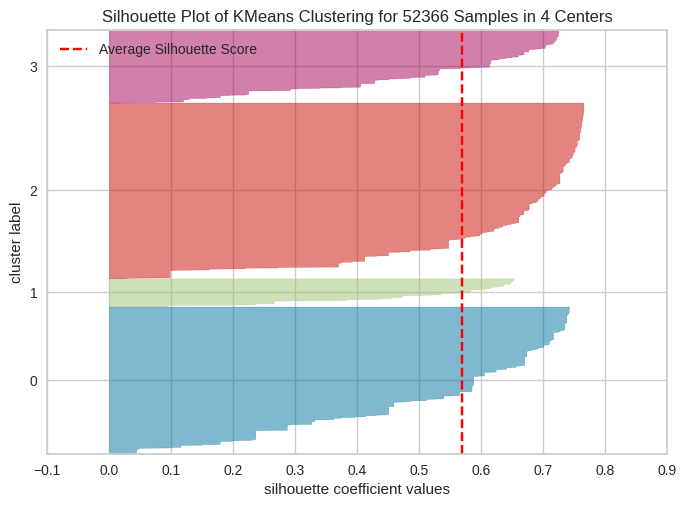

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 52366 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

modelo = KMeans(4, random_state=0)

# Visualizamos el gráfico de silueta
visualizador = SilhouetteVisualizer(modelo, colors='yellowbrick')    # Instancio el visualizador
visualizador.fit(ds_train)

plt.xlabel("Coeficiente de silhouette")
plt.ylabel("Grupos")
plt.title("Silhouette plot para cuatro centroides")
visualizador.show()


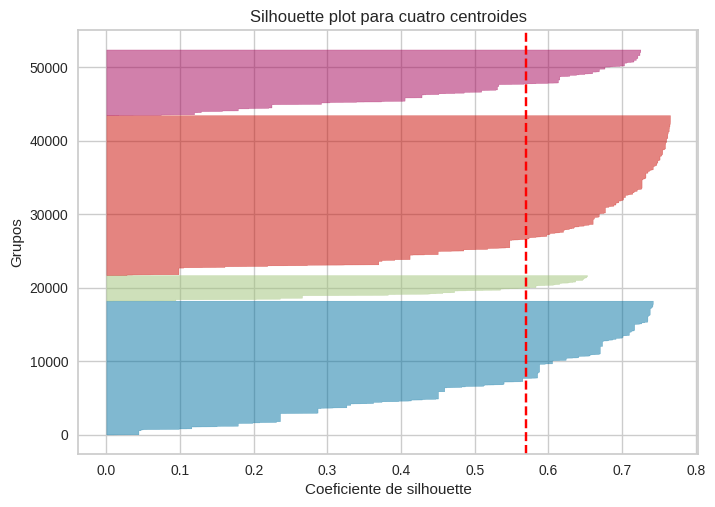

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

visualizador_2= SilhouetteVisualizer(modelo, colors='yellowbrick')    # Instancio el visualizador
visualizador_2.fit(ds_train)
plt.xlabel("Coeficiente de silhouette")
plt.ylabel("Grupos")
plt.title("Silhouette plot para cuatro centroides")
plt.show()

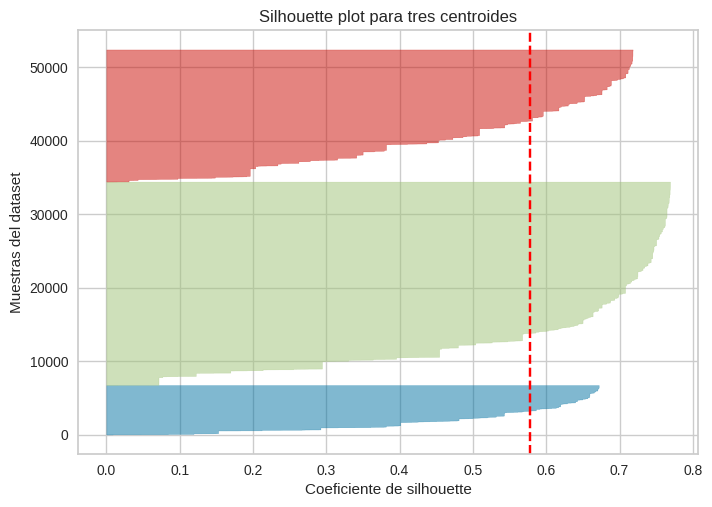

In [23]:
modelo_3K = KMeans(3, random_state=0)

visualizador_test_3= SilhouetteVisualizer(modelo_3K, colors='yellowbrick')    # Instancio el visualizador
visualizador_test_3.fit(ds_train)
plt.xlabel("Coeficiente de silhouette")
plt.ylabel("Muestras del dataset")
plt.title("Silhouette plot para tres centroides")
plt.show()

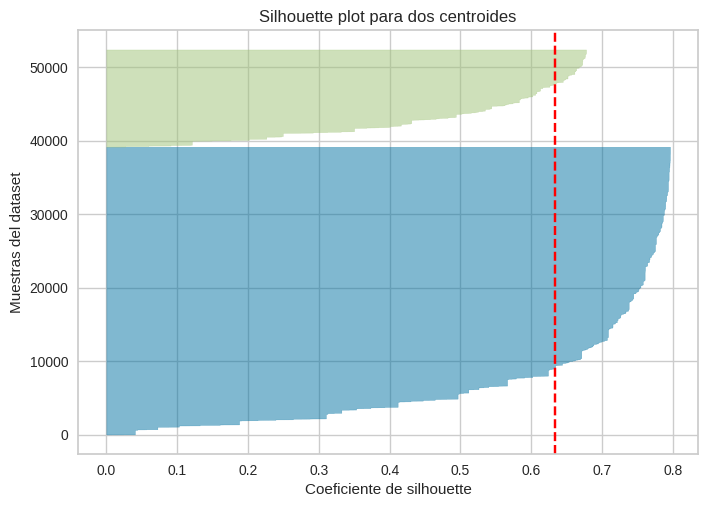

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
modelo_2K = KMeans(2, random_state=0)
visualizador_2= SilhouetteVisualizer(modelo_2K, colors='yellowbrick')    # Instancio el visualizador
visualizador_2.fit(ds_train)
plt.xlabel("Coeficiente de silhouette")
plt.ylabel("Muestras del dataset")
plt.title("Silhouette plot para dos centroides")
plt.show()

##### Pequeña prueba de resultado con distinta cantidad de clusters ( confirmación de elección correcta )

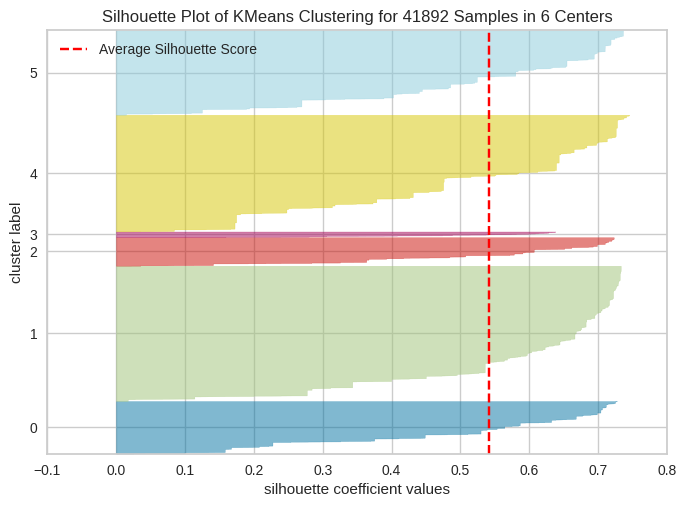

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 41892 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
## Comparativa con seis. Practicamente mismo resultado y dos dummies
modelo_6K = KMeans(6, random_state=0)

visualizador_test= SilhouetteVisualizer(modelo_6K, colors='yellowbrick')    # Instancio el visualizador
visualizador_test.fit(ds_train)
visualizador_test.show()

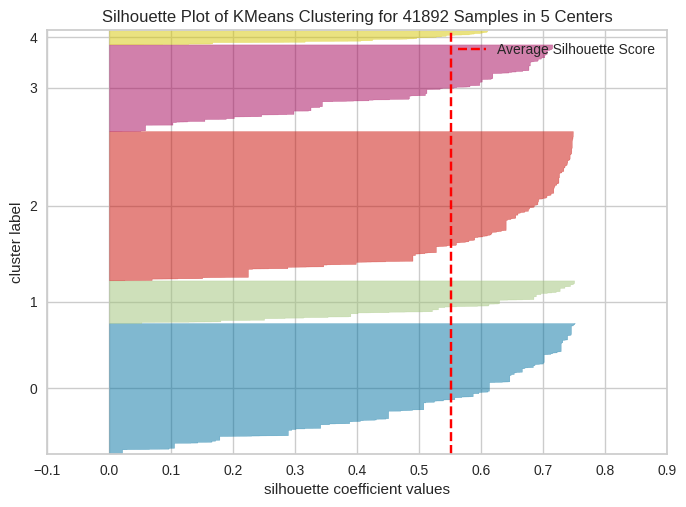

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 41892 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
modelo_5K = KMeans(5, random_state=0)

visualizador_test_5= SilhouetteVisualizer(modelo_5K, colors='yellowbrick')    # Instancio el visualizador
visualizador_test_5.fit(ds_train)
visualizador_test_5.show()

##### ANALISIS: Podemos observar que los clusters tienen un promedio del coeficiente de silhouette similar ( entre un 0.5 y 0.6 ) pero tienen densidades diferentes, donde el azul y el rojo tienen aproximadamente mil quinientas observaciones cada uno, mientras que los otros dos parecerían tener quinientas.

#### MAPAs DE CABA

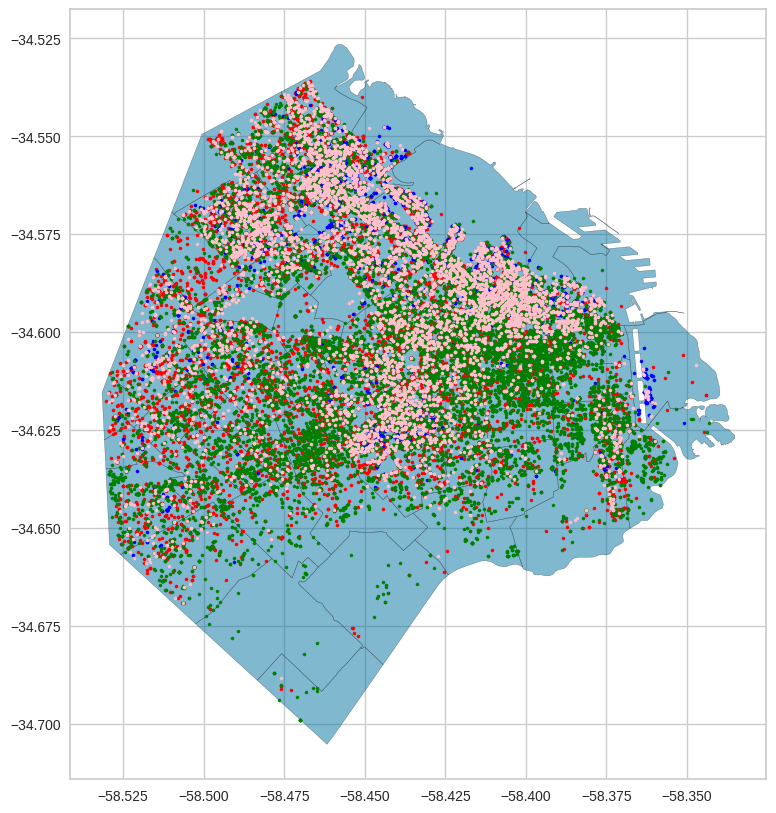

In [ ]:
# Paso 1: Filtramos puntos dentro de los límites de CABA utilizando el archivo GeoJSON de barrios
# Cargar el archivo GeoJSON de los barrios de CABA
barrios_caba = gpd.read_file(ruta + "barrios_caba.geojson")

# Convertir latitud y longitud en puntos geométricos
geometrias = []
for i in range(0,4):
  geometrias.append([Point(xy) for xy in zip(ds_train[modelo.labels_== i]["longitud"], ds_train[modelo.labels_== i]["latitud"]) ])

crs = {"init": "epsg:4326"}  # Sistema de coordenadas WGS84

# Crear un GeoDataFrame a partir del DataFrame limpio y los puntos geométricos
gdfs_propiedades = []
for i in range(0,4):
  gdfs_propiedades.append(
      gpd.GeoDataFrame(
        ds_train[modelo.labels_== i],
        crs=crs,
        geometry=geometrias[i]
      )
  )


# Paso 2: Plotear el resultado sobre un mapa
import matplotlib.pyplot as plt

# Plotear los barrios de CABA
barrios_caba.plot(
    alpha=0.5,
    edgecolor="k",
    figsize=(10, 10)
    )

def selector_color(i=int):
  if i == 0:
    return "red"
  elif i == 1:
    return "blue"
  elif i == 2:
    return "green"
  elif i == 3:
    return "pink"


# Plotear los puntos filtrados
for i in range(0,4):
  gdfs_propiedades[i].plot(
    ax=plt.gca(),
    marker="o",
    color=selector_color(i),
    markersize=5,
    )


# Muestro toda la grafica.
plt.show()


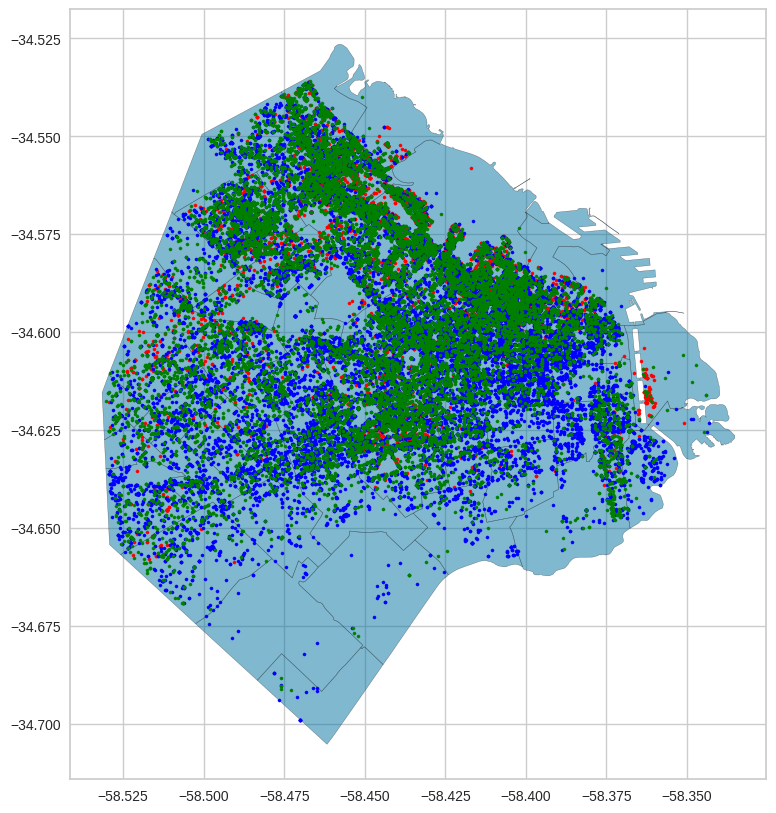

In [ ]:
# Paso 1: Filtramos puntos dentro de los límites de CABA utilizando el archivo GeoJSON de barrios
# Cargar el archivo GeoJSON de los barrios de CABA
barrios_caba = gpd.read_file(ruta + "barrios_caba.geojson")

# Convertir latitud y longitud en puntos geométricos
geometrias = []
for i in range(0,3):
  geometrias.append([Point(xy) for xy in zip(ds_train[modelo_3K.labels_== i]["longitud"], ds_train[modelo_3K.labels_== i]["latitud"]) ])

crs = {"init": "epsg:4326"}  # Sistema de coordenadas WGS84

# Crear un GeoDataFrame a partir del DataFrame limpio y los puntos geométricos
gdfs_propiedades = []
for i in range(0,3):
  gdfs_propiedades.append(
      gpd.GeoDataFrame(
        ds_train[modelo_3K.labels_== i],
        crs=crs,
        geometry=geometrias[i]
      )
  )

# Paso 2: Plotear el resultado sobre un mapa
import matplotlib.pyplot as plt

# Plotear los barrios de CABA
barrios_caba.plot(
    alpha=0.5,
    edgecolor="k",
    figsize=(10, 10)
    )


# Plotear los puntos filtrados
for i in range(0,3):
  gdfs_propiedades[i].plot(
    ax=plt.gca(),
    marker="o",
    color=selector_color(i),
    markersize=5,
    )

# Muestro toda la grafica.
plt.show()


##### Quiza el resultado a muchos podría asustar, ya que parecería que los barrios no tienen mucha influencia en la categorización. Pero debemos tener en cuenta que la correlaciones mas debiles eran las de coordenadas geográficas, siendo los demas factores mucho más preponderantes. Por lo que, realizar una proyección del dataset en un mapa correspondería a proyectar contra sus dos "direcciones" menos significativas.
##### Para comprender mejor el punto proponemos observar el siguiente ejemplo. Se crearon dos datasets de muestras aleatorias con forma de disco plano, donde uno de ellos se encuentra en el plano Z=0 y el otro en Z=30

In [ ]:
# Creacion de los discos
from sklearn.datasets import make_circles
X1, y = make_circles(500, noise=.5)
X2, y = make_circles(500, noise=.5)

ALTURA_1 = 0
ALTURA_2 = 30
def make_3D(np_array, z):
  list_result = []
  for i in np_array:
    tmp = []
    for j in i:
      tmp.append(j)
    tmp.append(z)
    list_result.append(tmp)

  return np.array(list_result)

X1_3D = make_3D(X1,ALTURA_1)
X2_3D = make_3D(X2,ALTURA_2)
X = np.concatenate([X1_3D,X2_3D])

# Agrupamiento
labels = KMeans(2, random_state=0).fit_predict(X)

# Calcular hopkins con dataset
results = []
for i in range(0,100):
  results.append(hopkins_statistic(pd.DataFrame(X)))
print("Tendencia al agrupamiento: {}%".format(round(sum(results)/len(results),4)*100))


Tendencia al agrupamiento: 98.92%


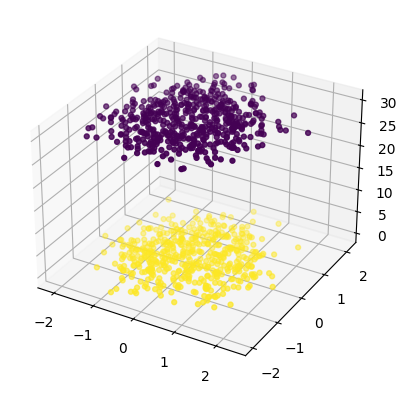

In [ ]:
# Ploteo scatter tridimensional del dataset
ax = plt.axes(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], c=labels,
            s=50, cmap='viridis',marker='.')


###### Se pueden observar claramente dos datasets perfectamente separados y clasificados. Pero ahora veamos que ocurre al proyectar el dataset sobre el plano XY...

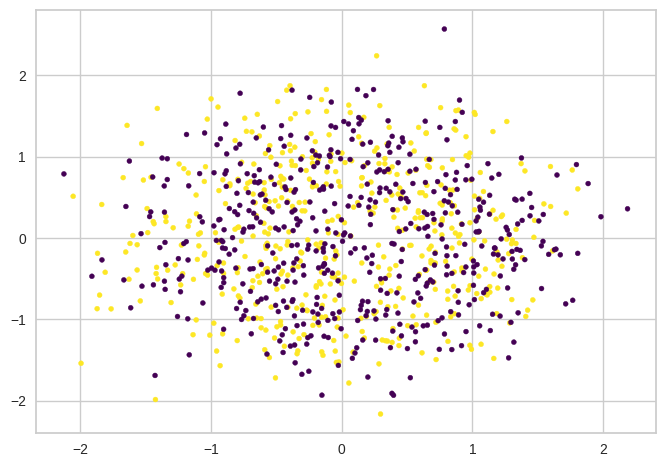

In [ ]:
plt.scatter(X[:, 0], X[:,1], c=labels,
            s=50, cmap='viridis',marker='.')
plt.show()

##### Desde esta perspectiva parece que fue pésimo el agrupamiento por KMeans. Pero nada más lejos de la realidad, el problema es que estamos proyectando en una dirección que anula el feature más significativo.
##### Este punto es analogo a lo que esta ocurriendo en el mapa, solo que pasamos de N-dimensiones a 2D dimensiones